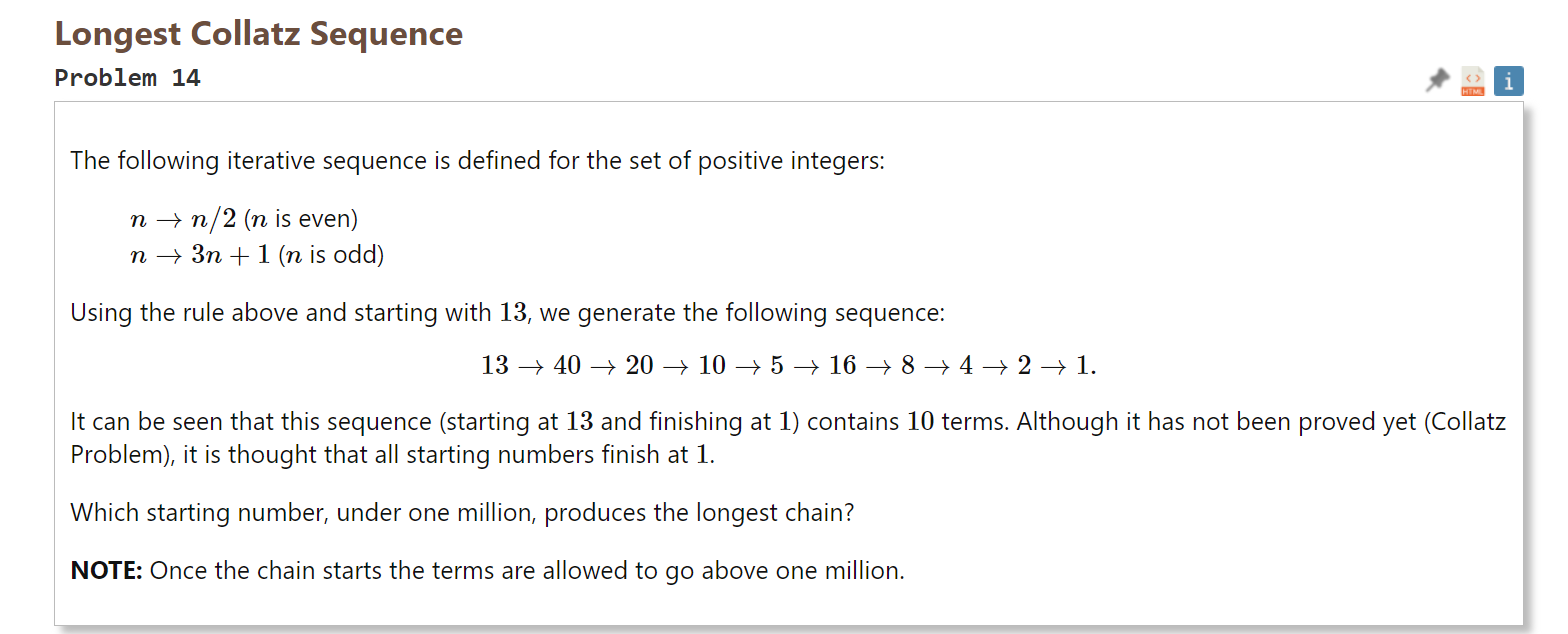

In [1]:
import pytest
import ipytest
ipytest.autoconfig()

# Storing Old Sequences

In [20]:
def next_term(n):
    if n%2 == 0: return n/2
    else: return 3*n + 1


def check_sequence_length(n, all_term_lengths = {1:1, 2:2}):
    if n in all_term_lengths:
        return all_term_lengths[n], all_term_lengths
    else:
        len_terms, all_term_lengths = check_sequence_length(next_term(n), all_term_lengths)
        len_terms += 1
        all_term_lengths.update({int(n): len_terms})
        return len_terms, all_term_lengths


def find_longest_chain(up_to=1_000_000):
    if up_to == 1 or up_to == 2: return 1, 1
    elif up_to == 3: return 2, 2
        
    longest_chain = 0
    all_term_lengths = {1:1, 2:2}
    for i in range(3, up_to):
        if i in all_term_lengths: continue
        term_chain_length, all_term_lengths = check_sequence_length(i, all_term_lengths)
        if term_chain_length > longest_chain:
            longest_chain = term_chain_length
            longest_start = i
        print(f'{round((i+1)*100/up_to, 2)}%', end='\r')
    return longest_start, longest_chain

In [21]:
find_longest_chain()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [95]:
%%ipytest

@pytest.mark.parametrize('n, next',[
    (2, 1),
    (5, 16),
    (16, 8),
    (63, 190)
])
def test_next_term(n, next):
    assert next_term(n) == next

@pytest.mark.parametrize('start, all_term_lengths, term_chain_length, new_all_term_lengths',[
    (
        2, {1:1},
        2, {1: 1, 2: 2}
    ),
    (
        3, {1: 1, 2: 2},
        8, {1: 1, 2: 2, 4: 3, 8: 4, 16: 5, 5: 6, 10: 7, 3: 8}
    )
])
def test_check_sequence_length(start, all_term_lengths, term_chain_length, new_all_term_lengths) :
    assert check_sequence_length(start, all_term_lengths) == (term_chain_length, new_all_term_lengths)

@pytest.mark.parametrize('up_to, longest_start, longest_chain',[
    (3, 2,2),
    (5, 3,8)
])
def test_find_longest_chain(up_to, longest_start, longest_chain) :
    assert find_longest_chain(up_to) == (longest_start, longest_chain)

........                                                                                     [100%]
8 passed in 0.04s


# Without Storing Old Sequences

In [9]:
def check_sequence_length_2(n):
    len_terms = 1
    while True:
        if n == 1:
            return len_terms
        else:
            n = next_term(n)
            len_terms += 1


def find_longest_chain_2(up_to=1_000_000): 
    longest_chain = 0
    longest_start = 1
    for i in range(1, up_to):
        len_terms = check_sequence_length_2(i)
        if len_terms > longest_chain:
            longest_chain = len_terms
            longest_start = i
        #print(f'{round((i+1)*100/up_to, 2)}%', end='\r')
    return longest_start, longest_chain

# Only Storing Values below 1m

In [ ]:
def check_sequence_length_2(n):
    len_terms = 1
    while True:
        if n == 1:
            return len_terms
        else:
            n = next_term(n)
            len_terms += 1

def find_longest_chain_2(up_to=1_000_000): 
    longest_chain = 0
    longest_start = 1
    all_values = {1: 1, 2:2}
    for i in range(3, up_to):
        if i in all_values: continue
        len_terms = check_sequence_length_2(i)
        if len_terms > longest_chain:
            longest_chain = len_terms
            longest_start = i
        #print(f'{round((i+1)*100/up_to, 2)}%', end='\r')
    return longest_start, longest_chain

10000%
20000%
30000%
40000%
50000%
60000%
70000%
80000%
90000%
10000%


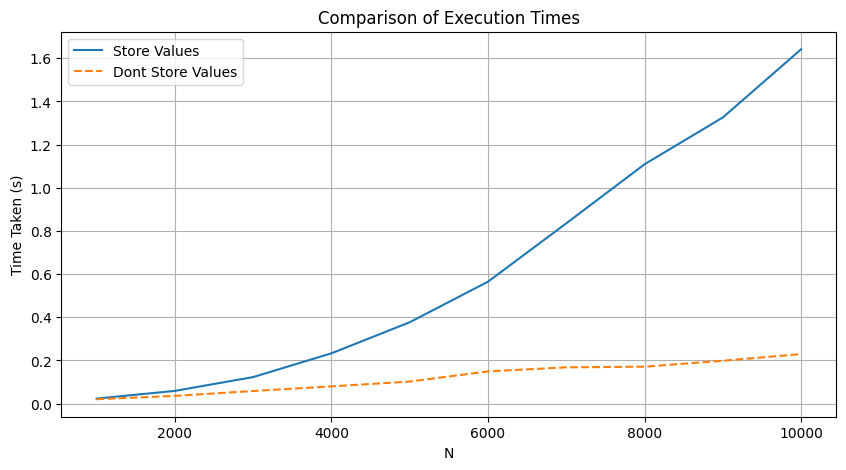

In [117]:
import matplotlib.pyplot as plt
import time
# Range of N values to test
step = 1000
N_values = range(step, 10*step + 1, step)  # From 10 to 100, in steps of 10

# Lists to store execution times
times_1 = []
times_2 = []

# Measure execution times
for N in N_values:
    start_time = time.time()
    find_longest_chain(N)
    times_1.append(time.time() - start_time)
    
    start_time = time.time()
    find_longest_chain_2(N)
    times_2.append(time.time() - start_time)
    print(N)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(N_values, times_1, label='Store Values')
plt.plot(N_values, times_2, label='Dont Store Values', linestyle='--')
plt.xlabel('N')
plt.ylabel('Time Taken (s)')
plt.title('Comparison of Execution Times')
plt.legend()
plt.grid(True)
plt.show()